# Data Description
Scrapped from twitters from 2016-01-01 to 2019-03-29, Collecting Tweets containing Bitcoin or BTC

# Exploratory Data Analysis

## 1. Crypto Sentiments

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import zipfile
import re
import sys
sys.path.insert(0,'/content/drive/MyDrive') # https://medium.com/analytics-vidhya/importing-your-own-python-module-or-python-file-into-colab-3e365f0a35ec
import helper_func_v2_20220416 as hf
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta


### 1-1. Data Cleaning

In [ ]:
# read in the file
df = hf.read_zip_csv_chunk(
    filepath = '/content/drive/MyDrive/Research: Changing Opinions towards Cryptocurrency under Rising Cost of Living/Data/16mil_tweets.csv.zip',
    filename = 'tweets.csv',
    chunksize = 500000
)


Processing Chunk No. 1
Processing Chunk No. 2
Processing Chunk No. 3
Processing Chunk No. 4
Processing Chunk No. 5
Processing Chunk No. 6
Processing Chunk No. 7
Processing Chunk No. 8
Processing Chunk No. 9
Processing Chunk No. 10
Processing Chunk No. 11
Processing Chunk No. 12
Processing Chunk No. 13
Processing Chunk No. 14
Processing Chunk No. 15
Processing Chunk No. 16
Processing Chunk No. 17
Processing Chunk No. 18
Processing Chunk No. 19
Processing Chunk No. 20
Processing Chunk No. 21
Processing Chunk No. 22
Processing Chunk No. 23
Processing Chunk No. 24
Processing Chunk No. 25
Processing Chunk No. 26
Processing Chunk No. 27
Processing Chunk No. 28
Processing Chunk No. 29
Processing Chunk No. 30
Processing Chunk No. 31
Processing Chunk No. 32
Processing Chunk No. 33
Processing Chunk No. 34
The dataset's shape:  (16889765, 9)


In [ ]:
# drop the unused columns
df = df[['id','user','timestamp','replies','likes','retweets','text\r']]
df.columns = ['id','user','timestamp','replies','likes','retweets','text']

In [ ]:
# reduce the memory
df = hf.reduce_mem(df)

902.01 Mb, 644.29 Mb (28.57 %)


#### 1-1-2. Date

In [ ]:
from datetime import datetime, date, time, timedelta

df['date'] = list(map(lambda time:pd.Timestamp.date(pd.Timestamp(time)), df.timestamp))
df['year_month'] = list(map(lambda x:str(x.year)+"-"+str(x.month), df.date))
df['year'] = list(map(lambda x:x.year, df.date)) 
df['month'] = list(map(lambda dt:dt.month, df.date))
df = df.drop(['timestamp'],axis = 1)

#### 1-1-2. Text
- Drop the tweets with non-English text
- Drop the tweets with null text

In [ ]:
# Great! There is no null text
print("Null text tweets count: ", df.text.isnull().sum())
df = df[~df.text.isnull()]

Null text tweets count:  0


In [ ]:
!pip install whatthelang

In [ ]:
from whatthelang import WhatTheLang
wtl = WhatTheLang()
result = [wtl.predict_lang(row) for row in df['text']]
df['lang'] = result
# df.groupby("lang")['id'].count().sort_values(ascending = False)
df.head()

In [ ]:
# Keep only the tweets in English
df = df[df["lang"] == 'en']
df.shape

#### Output the Cleaned csv

In [ ]:
en_df.to_csv(r'clean_16M_btc_tweets.csv')

path = '/content/drive/My Drive/clean_16M_btc_tweets.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  en_df.to_csv(f)

### 1-2. Data Exploration

#### 1-2-1. Data Pre-Processing

In [ ]:
# Read in the clean csv (English only)
def read_csv_chunk(filepath,chunksize):
    num_of_chunk = 0

    df = pd.DataFrame()

    for chunk in pd.read_csv(filepath,lineterminator='\n',
                             chunksize=chunksize):
        num_of_chunk += 1
        df = pd.concat([df, chunk], axis=0)
        print('Processing Chunk No. ' + str(num_of_chunk))     

    print("The dataset's shape: ", df.shape)
    df.reset_index(inplace=True)
    return df

df = read_csv_chunk('/content/drive/MyDrive/Research: Changing Opinions towards Cryptocurrency under Rising Cost of Living/Data/clean_16m_btc_tweets.csv',500000)

In [5]:
# Drop unnecessary columns to save memory
df = df.drop(['index', 'Unnamed: 0'],axis= 1)

In [6]:
# Additional Data Processing

# After diving into the tweet content details and cross checking with the platform
# I decided to drop all the 220 tweets before 2012-01-01, I suspect that the API calling returns incomplete datasets (incontinuous date)
df = df[df.date>='2012-01-01']
df = hf.reduce_mem(df)

df['date'] = list(map(lambda x: datetime.strptime(x,"%Y-%m-%d"),df.date))
df['year_month'] = list(map(lambda x:str(x.year)+"-"+str(x.month), df.date))
df['year'] = list(map(lambda x:x.year, df.date)) 


998.40 Mb, 711.36 Mb (28.75 %)


In [155]:
hf.view(df)

The dataset consists of 13086228 rows and 11 columns
The columns are: ['id', 'user', 'replies', 'likes', 'retweets', 'text', 'date', 'month', 'lang', 'year_month', 'year']


,id,user,replies,likes,retweets,text,date,month,lang,year_month,year
data_types,float32,object,int32,int32,int32,object,datetime64[ns],int8,object,object,int64
value_counts,1709043,1093160,936,3055,1712,11944874,2883,12,1,95,8
null_counts,0,1,0,0,0,0,0,0,0,0,0
0,1132977050873757696.0,bitcointe,0,0,0,Cardano: Digitize Currencies; EOS https://t.co...,2019-05-27 00:00:00,5,en,2019-5,2019
1,1132977050873757696.0,3eyedbran,0,2,1,Another Test tweet that wasn't caught in the s...,2019-05-27 00:00:00,5,en,2019-5,2019
2,1132977119593234432.0,DetroitCrypto,0,0,0,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,2019-05-27 00:00:00,5,en,2019-5,2019


#### Predicting Sentiment Labels using supervised ML-based approach: **BERT**  
> BERT stands for **Bidirectional Encoder Representations from Transformers** and it is a state-of-the-art machine learning model used for NLP tasks. **Jacob Devlin and his colleagues** developed BERT at **Google in 2018**. Devlin and his colleagues trained the BERT on English Wikipedia (2,500M words) and BooksCorpus (800M words) and achieved the best accuracies for some of the NLP tasks in 2018. There are two pre-trained general BERT variations: The base model is a **12-layer, 768-hidden, 12-heads, 110M parameter** neural network architecture, whereas the large model is a 24-layer, 1024-hidden, 16-heads, 340M parameter neural network architecture. Figure 2 shows the visualization of the BERT network created by Devlin et al.

In this notebook I'll use the **HuggingFace's** transformers library to **fine-tune pretrained BERT model.**

Source: http://mccormickml.com/2019/07/22/BERT-fine-tuning/, https://skimai.com/fine-tuning-bert-for-sentiment-analysis/, https://towardsdatascience.com/sentiment-analysis-in-10-minutes-with-bert-and-hugging-face-294e8a04b671 



In [6]:
!pip install transformers

**Step 1: Light Pre-Processing**     
Before tokenizing our text, we will perform some **slight processing** on our text including removing entity mentions (eg. @united) and some special character. The level of processing here is much less than in previous approachs because BERT was trained with the entire sentences

In [7]:
def text_preprocessing(text):
    """
    - Remove entity mentions (eg. '@united')
    - Correct errors (eg. '&amp;' to '&')
    @param    text (str): a string to be processed.
    @return   text (Str): the processed string.
    """
    # Remove '@name'
    text = re.sub(r'(@.*?)[\s]', ' ', text)

    # Remove Links
    text = re.sub(r'http\S+', '', text)                                

    # Replace '&amp;' with '&'
    text = re.sub(r'&amp;', '&', text)

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [8]:
# Light Preprocessing for BERT (~2 min 10s for 13 million tweets)
df['clean_text'] = list(map(lambda x:text_preprocessing(x), df.text))

**Step 2: BERT Tokenizer**     
In order to apply the pre-trained BERT, we must use the tokenizer provided by the library. This is because (1) the model has a specific, fixed vocabulary and (2) the BERT tokenizer has a particular way of handling out-of-vocabulary words.

In addition, we are required to add special tokens to the **start and end** of each sentence, **pad & truncate** all sentences to a **single constant length (max sentence length <= 512 tokens)**, and explicitly specify what are padding tokens with the "attention mask".

The `tokenizer.encode_plus` method of BERT tokenizer will:

1. split our text into tokens,
2. add the special `[CLS]`(always the **first** token) and `[SEP]`(always the **last** token) tokens, and
3. convert these tokens into indexes(**Token IDs**) of the tokenizer vocabulary,
4. pad or truncate sentences to max length, and
5. create attention mask (**Padding**).
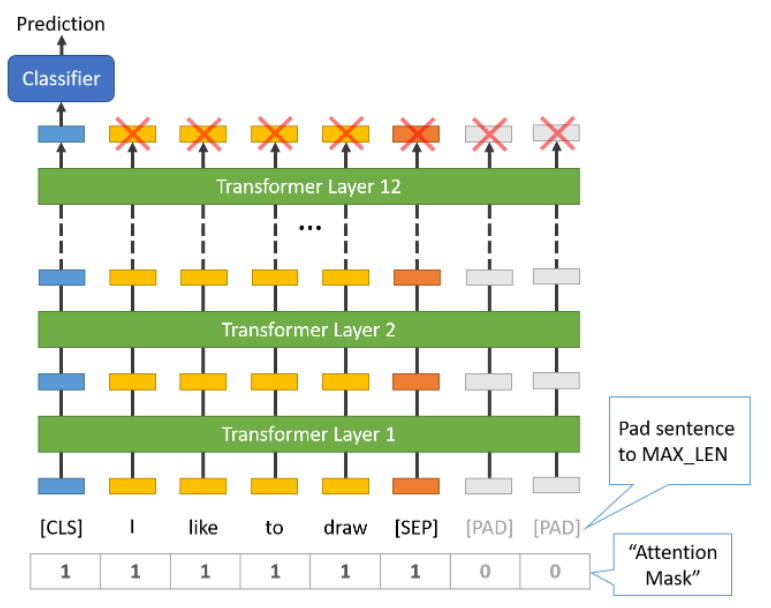
> http://mccormickml.com/2019/07/22/BERT-fine-tuning/

In [9]:
!pip install vaderSentiment

#### Lexicon-based Approach to Extract Sentiments: **VADER**   
*VADER doesn't require pre-processing work, it handles emojis, slangs, emoticons pretty well*
> The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).             
- positive sentiment : (compound score >= 0.05) 
- neutral sentiment : (compound score > -0.05) and (compound score < 0.05) 
- negative sentiment : (compound score <= -0.05)        
Source: https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f; https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/

In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments
# of the sentence.
def get_vader_sentiment(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
    sentiment_score = sentiment_dict['compound']

    # print("Overall sentiment dictionary is : ", sentiment_dict)
    # print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    # print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    # print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    # print("Sentence Overall Rated As", end = " ")

    # sentimen classification
    if sentiment_dict['compound'] >= 0.05 :
        sentiment_type = 'positive'
    elif sentiment_dict['compound'] <= - 0.05 :
        sentiment_type = 'negative'
    else :
        sentiment_type = 'neutral'
    return sentiment_type, sentiment_score

In [ ]:
# # Retrieve sentiment classification
# # takes ~2 mins 10s to run for every 10,000 tweets 

# # df[['sentiment_type','sentiment_score']] = list(map(lambda txt:get_vader_sentiment(txt), df.text)) # common method

# vader_res = np.vectorize(get_vader_sentiment)(df.clean_text[:2000000])
# chunk_2m = df[:2000000].copy()
# chunk_2m['sentiment_type'] = vader_res[0]
# chunk_2m['sentiment_score'] = vader_res[1]


In [ ]:
# # Output the VADER extracted csv
# chunk_2m.drop(['text'],axis = 1).to_csv(
#     '/content/drive/MyDrive/Research: Changing Opinions towards Cryptocurrency under Rising Cost of Living/Data/chunk_2m.csv',index_label = False)

Prepare a sample for Perspectives Result (2022/04/24)

In [15]:
# Retrieve sentiment classification
# takes ~2 mins 10s to run for every 10,000 tweets 

# df[['sentiment_type','sentiment_score']] = list(map(lambda txt:get_vader_sentiment(txt), df.text)) # common method

sample_df_1perc = df.sample(frac = 0.1, random_state = 123)
sample_df_1perc = sample_df_1perc.drop(['id','user','text'],axis = 1)

vader_res = np.vectorize(get_vader_sentiment)(sample_df_1perc.clean_text)
sample_df_1perc['sentiment_type'] = vader_res[0]
sample_df_1perc['sentiment_score'] = vader_res[1]


In [18]:
sample_df_1perc.head()

,replies,likes,retweets,date,month,lang,year_month,year,clean_text,sentiment_type,sentiment_score
444698,0,0,0,2019-05-16,5,en,2019-5,2019,Right? I feel they owe us a bitcoin or something,neutral,0.0000
5021090,0,0,0,2019-06-22,6,en,2019-6,2019,"Hello, how about justin pay me 2 bitcoin I jus...",positive,0.3612
750782,0,0,0,2019-05-21,5,en,2019-5,2019,#bitrefill #launches #giftcards on #amazon #ch...,positive,0.5423
11162353,0,0,0,2019-10-13,10,en,2019-10,2019,We trade Bitcoin Google usd Itunes Apple store...,positive,0.1779
7748098,0,0,0,2019-08-06,8,en,2019-8,2019,"me, IRL",neutral,0.0000


In [19]:
# Output the VADER extracted csv
sample_df_1perc.to_csv(
    '/content/drive/MyDrive/Research: Changing Opinions towards Cryptocurrency under Rising Cost of Living/Data/sample_data_10perc.csv',index_label = False)

#### 1-2-2. Time Series Trend
- Total number of BTC tweets per month
- Average number of likes per BTC tweet
- Average number of retweets per BTC tweet



In [ ]:
# pd.set_option('display.max_rows', None)
# df.groupby('date')['id'].count().sort_index()

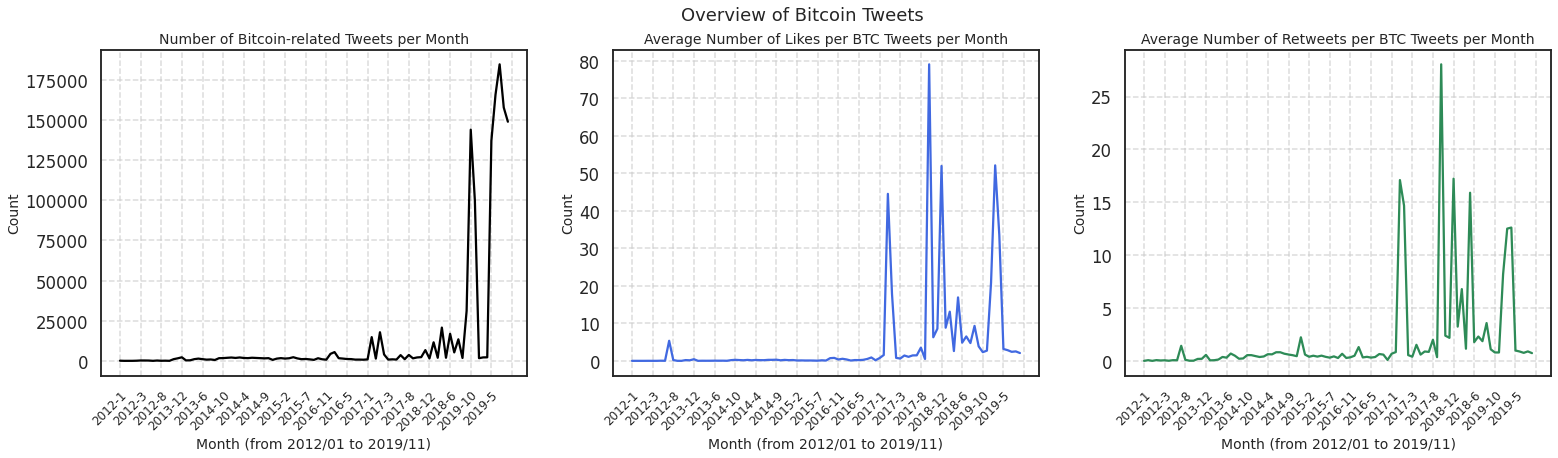

In [113]:
ts_grouped_df = df.groupby("year_month").agg({'clean_text':"count",'likes':"sum",'retweets':"sum"}).reset_index()
ts_grouped_df.columns = ['year_month','btc_tweets_cnt','total_btc_tweets_likes','total_btc_tweets_retweets']
ts_grouped_df['avg_btc_tweets_likes'] = ts_grouped_df.total_btc_tweets_likes/ts_grouped_df.btc_tweets_cnt
ts_grouped_df['avg_btc_tweets_retweets'] = ts_grouped_df.total_btc_tweets_retweets/ts_grouped_df.btc_tweets_cnt


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(26, 6))


sns.lineplot(x='year_month', y='btc_tweets_cnt',
              data=ts_grouped_df,ax=axes[0],
            color = 'black')
axes[0].set_title(f"Number of Bitcoin-related Tweets per Month",fontsize=14)
axes[0].set_xlabel('Month (from 2012/01 to 2019/11)',fontsize = 14)
axes[0].set_ylabel(f"Count",fontsize = 14)
axes[0].xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.setp(axes[0].get_xticklabels(), fontsize = 12, rotation=45, ha="right", rotation_mode="anchor")
axes[0].grid(linestyle="--", alpha=0.7)

sns.lineplot(x='year_month', y='avg_btc_tweets_likes',
              data=ts_grouped_df,ax=axes[1],
            color = 'royalblue')
axes[1].set_title(f"Average Number of Likes per BTC Tweets per Month",fontsize=14)
axes[1].set_xlabel('Month (from 2012/01 to 2019/11)',fontsize = 14)
axes[1].set_ylabel(f"Count",fontsize = 14)
axes[1].xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.setp(axes[1].get_xticklabels(), fontsize = 12, rotation=45, ha="right", rotation_mode="anchor")
axes[1].grid(linestyle="--", alpha=0.7)


sns.lineplot(x='year_month', y='avg_btc_tweets_retweets',
              data=ts_grouped_df,ax=axes[2],
            color = 'seagreen')
axes[2].set_title(f"Average Number of Retweets per BTC Tweets per Month",fontsize=14)
axes[2].set_xlabel('Month (from 2012/01 to 2019/11)',fontsize = 14)
axes[2].set_ylabel(f"Count",fontsize = 14)
axes[2].xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.setp(axes[2].get_xticklabels(), fontsize = 12, rotation=45, ha="right", rotation_mode="anchor")
axes[2].grid(linestyle="--", alpha=0.7)

fig.suptitle("Overview of Bitcoin Tweets", fontsize = 18)
plt.savefig('/content/drive/MyDrive/Research: Changing Opinions towards Cryptocurrency under Rising Cost of Living/Graph/eda_crypto_lineplot_1.png',dpi=300)
plt.show()


In [ ]:
# ts_grouped_df = df.groupby("year").agg({'id':"count",'likes':"sum",'retweets':"sum"}).reset_index()
# ts_grouped_df.columns = ['year','btc_tweets_cnt','total_btc_tweets_likes','total_btc_tweets_retweets']
# ts_grouped_df['avg_btc_tweets_likes'] = ts_grouped_df.total_btc_tweets_likes/ts_grouped_df.btc_tweets_cnt
# ts_grouped_df['avg_btc_tweets_retweets'] = ts_grouped_df.total_btc_tweets_retweets/ts_grouped_df.btc_tweets_cnt

# ts_grouped_df.sort_values(by='year',ascending = True)

## 2. Cost of Living
Data Source: [U.S.Buereau of Labor Statistics - CPI-U](https://data.bls.gov/home.htm)

### 2-1. Data Pre-Processing

In [2]:
# Load CPI data
cpi_df = pd.read_csv("/content/drive/MyDrive/Research: Changing Opinions towards Cryptocurrency under Rising Cost of Living/Data/bls_cpi_2012_2019.csv",sep=',')

# Basic Transformation & Cleaning
cpi_df = cpi_df.drop(['HALF1','HALF2'],axis =1)
cpi_df = cpi_df.set_index(['Year']).stack().reset_index()
cpi_df.columns = ['year','month','cpi']

# Month Index
month_dict = {"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}
cpi_df["month_ind"] = list(map(lambda mon: month_dict[mon], cpi_df['month']))
cpi_df['year_month'] = list(map(lambda x,y:str(x)+"-"+str(y),cpi_df.year,cpi_df.month_ind))
# Drop 2019-Dec (due to tweet constraint)
cpi_df = cpi_df[(cpi_df.year<=2019)&(~((cpi_df.year==2019)&(cpi_df.month_ind==12))) ]

# overview
hf.view(cpi_df)

The dataset consists of 95 rows and 5 columns
The columns are: ['year', 'month', 'cpi', 'month_ind', 'year_month']


,year,month,cpi,month_ind,year_month
data_types,int64,object,float64,int64,object
value_counts,8,12,95,12,95
null_counts,0,0,0,0,0
0,2012,Jan,226.665,1,2012-1
1,2012,Feb,227.663,2,2012-2
2,2012,Mar,229.392,3,2012-3


In [3]:
# pd.set_option('display.max_rows', 100)
# Calculate the month-over-month diff and year-over-year diff
cpi_df = cpi_df.sort_values(by=['year','month_ind'])
cpi_df['cpi_month_diff']= cpi_df.cpi.diff()
cpi_df['cpi_year_diff'] = cpi_df.cpi.diff(12)
cpi_df['cpi_MoM'] = list(map(lambda x,y:x/(x-y),
                         cpi_df.cpi,
                         cpi_df.cpi_month_diff))
cpi_df['cpi_YoY'] = list(map(lambda x,y:x/(x-y),
                         cpi_df.cpi,
                         cpi_df.cpi_year_diff))

### 2-2. Data Exploration

#### 2-2-1. Time Series Trend
- CPI
- CPI MoM
- CPI YoY

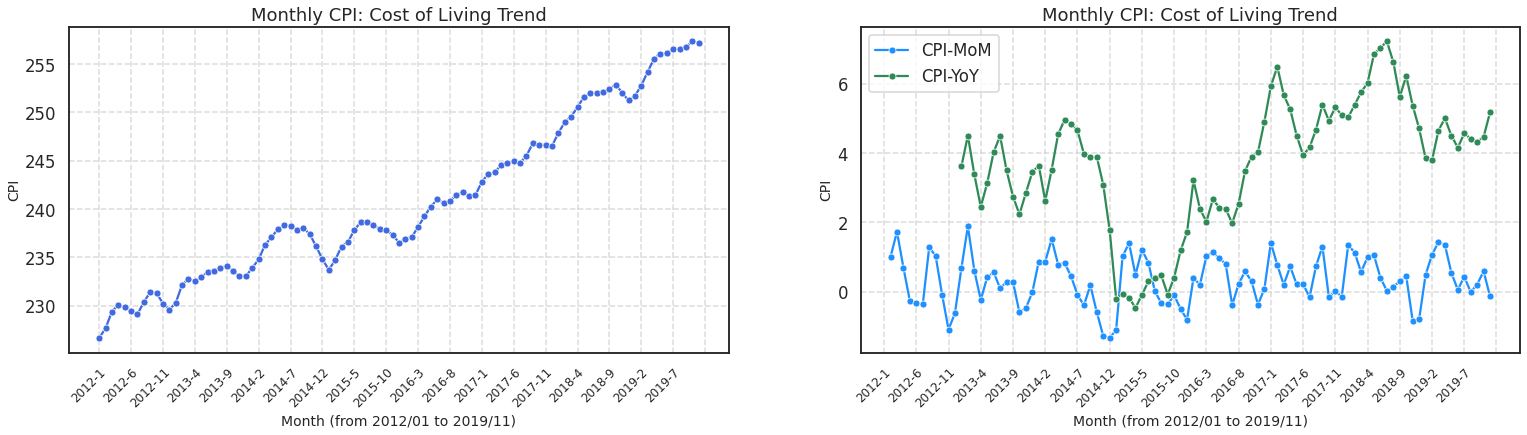

In [105]:
import matplotlib.ticker as ticker
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(26, 6))
sns.lineplot(x='year_month', y='cpi', marker= "o", markersize = 7,
              data=cpi_df, ax=axes[0],
            color = 'royalblue'
            )
axes[0].set_title(f"Monthly CPI: Cost of Living Trend",fontsize=18)
axes[0].set_xlabel('Month (from 2012/01 to 2019/11)',fontsize = 14)
axes[0].set_ylabel('CPI',fontsize = 14)
axes[0].xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.setp(axes[0].get_xticklabels(), fontsize = 12, rotation=45, ha="right", rotation_mode="anchor")

axes[0].grid(linestyle="--", alpha=0.7)

sns.lineplot(x='year_month', y='cpi_month_diff', marker= "o", markersize = 7,
              data=cpi_df, ax=axes[1],
            color = 'dodgerblue',label = 'CPI-MoM',
            )
sns.lineplot(x='year_month', y='cpi_year_diff', marker= "o", markersize = 7,
              data=cpi_df, ax=axes[1],
            color = 'seagreen',label = 'CPI-YoY',
            )
axes[1].set_title(f"Monthly CPI: Cost of Living Trend",fontsize=18)
axes[1].set_xlabel('Month (from 2012/01 to 2019/11)',fontsize = 14)
axes[1].set_ylabel('CPI',fontsize = 14)
axes[1].xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.setp(axes[1].get_xticklabels(), fontsize = 12, rotation=45, ha="right", rotation_mode="anchor")
axes[1].grid(linestyle="--", alpha=0.7)

plt.savefig('/content/drive/MyDrive/Research: Changing Opinions towards Cryptocurrency under Rising Cost of Living/Graph/eda_cost_lineplot.png',dpi=300)
plt.show()

In [ ]:
cpi_df

## 3. Correlation: Cost of Living, Crypto Sentiments, Opinion Polarization

### 3-1. Data Pre-Processing

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Research: Changing Opinions towards Cryptocurrency under Rising Cost of Living/Data/sample_data_10perc.csv")

In [5]:
df = df.dropna()

In [6]:
hf.view(df)

The dataset consists of 1288243 rows and 11 columns
The columns are: ['replies', 'likes', 'retweets', 'date', 'month', 'lang', 'year_month', 'year', 'clean_text', 'sentiment_type', 'sentiment_score']


,replies,likes,retweets,date,month,lang,year_month,year,clean_text,sentiment_type,sentiment_score
data_types,int64,int64,int64,object,int64,object,object,int64,object,object,float64
value_counts,404,1220,660,2847,12,1,95,8,1065346,3,15098
null_counts,0,0,0,0,0,0,0,0,0,0,0
444698,0,0,0,2019-05-16,5,en,2019-5,2019,Right? I feel they owe us a bitcoin or something,neutral,0.0
5021090,0,0,0,2019-06-22,6,en,2019-6,2019,"Hello, how about justin pay me 2 bitcoin I jus...",positive,0.3612
750782,0,0,0,2019-05-21,5,en,2019-5,2019,#bitrefill #launches #giftcards on #amazon #ch...,positive,0.5423


In [8]:
# Add the sentiment metrics

# 1) Percentage of Bitcoin-favorable Tweets
df['is_btc_favor_tweets'] = list(map(lambda x:1 if x=='positive' else 0,df.sentiment_type))
# 2) Bitcoin-favorable Scores (sentiment scores)
df['btc_favor_scores'] = list(df.is_btc_favor_tweets*df.sentiment_score)
# 3) Opinion Polarity w.r.t. Bitcoin
df['polarity_scores'] = list(map(abs, df.sentiment_score))
# 4) Total number of likes on BTC positive tweets
df['btc_favor_likes'] = list(df.is_btc_favor_tweets*df.likes)
# 5) retweets
df['btc_favor_retweets'] = list(df.is_btc_favor_tweets*df.retweets)

In [70]:

ts_grouped_df = df.groupby("year_month").agg({
    'is_btc_favor_tweets':["sum",'mean'],
    'btc_favor_likes':"sum",
    'btc_favor_retweets':"sum",
    'sentiment_score':'mean',
    'btc_favor_scores':'sum',
    'polarity_scores':'mean'}).reset_index()
ts_grouped_df.columns = ['year_month','total_btc_favor_count','perc_btc_favor_tweets','total_btc_favor_likes','total_btc_favor_retweets','avg_btc_sentiment_scores','total_btc_favor_scores','avg_polarity_scores']

ts_grouped_df['avg_btc_favor_likes'] = ts_grouped_df.total_btc_favor_likes/ts_grouped_df.total_btc_favor_count
ts_grouped_df['avg_btc_favor_retweets'] = ts_grouped_df.total_btc_favor_retweets/ts_grouped_df.total_btc_favor_count
ts_grouped_df['avg_btc_favor_scores'] = ts_grouped_df.total_btc_favor_scores/ts_grouped_df.total_btc_favor_count

ts_grouped_df['log_avg_btc_favor_likes'] = np.log1p(ts_grouped_df.avg_btc_favor_likes)
ts_grouped_df['log_avg_btc_favor_retweets'] = np.log1p(ts_grouped_df.avg_btc_favor_retweets)
ts_grouped_df['log_avg_btc_favor_scores'] = np.log1p(ts_grouped_df.avg_btc_favor_scores)

# ts_grouped_df['log_avg_btc_tweets_likes'] = np.log1p(ts_grouped_df.total_btc_tweets_likes/ts_grouped_df.btc_tweets_cnt)
# ts_grouped_df['log_avg_btc_tweets_retweets'] = np.log1p(ts_grouped_df.total_btc_tweets_retweets/ts_grouped_df.btc_tweets_cnt)
# ts_grouped_df['log_total_btc_tweets_cnt'] = np.log1p(ts_grouped_df.btc_tweets_cnt)

In [71]:
ts1 = pd.merge(left = ts_grouped_df, right = cpi_df, how = 'inner', on = 'year_month')
hf.view(ts1)

The dataset consists of 95 rows and 22 columns
The columns are: ['year_month', 'total_btc_favor_count', 'perc_btc_favor_tweets', 'total_btc_favor_likes', 'total_btc_favor_retweets', 'avg_btc_sentiment_scores', 'total_btc_favor_scores', 'avg_polarity_scores', 'avg_btc_favor_likes', 'avg_btc_favor_retweets', 'avg_btc_favor_scores', 'log_avg_btc_favor_likes', 'log_avg_btc_favor_retweets', 'log_avg_btc_favor_scores', 'year', 'month', 'cpi', 'month_ind', 'cpi_month_diff', 'cpi_year_diff', 'cpi_MoM', 'cpi_YoY']


,year_month,total_btc_favor_count,perc_btc_favor_tweets,total_btc_favor_likes,total_btc_favor_retweets,avg_btc_sentiment_scores,total_btc_favor_scores,avg_polarity_scores,avg_btc_favor_likes,avg_btc_favor_retweets,...,log_avg_btc_favor_retweets,log_avg_btc_favor_scores,year,month,cpi,month_ind,cpi_month_diff,cpi_year_diff,cpi_MoM,cpi_YoY
data_types,object,int64,float64,int64,int64,float64,float64,float64,float64,float64,...,float64,float64,int64,object,float64,int64,float64,float64,float64,float64
value_counts,95,89,95,78,83,95,95,95,86,93,...,93,95,8,12,95,12,94,82,94,83
null_counts,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,12,1,12
0,2012-1,5,0.03268,0,0,0.017875,2.7349,0.017875,0.0,0.0,...,0.0,0.436305,2012,Jan,226.665,1,NaN,NaN,NaN,NaN
1,2012-10,11,0.169231,0,4,0.083949,5.4567,0.083949,0.0,0.363636,...,0.310155,0.402837,2012,Oct,231.317,10,-0.09,NaN,0.999611,NaN
2,2012-11,12,0.166667,0,0,0.083225,6.42,0.095108,0.0,0.0,...,0.0,0.42853,2012,Nov,230.221,11,-1.096,NaN,0.995262,NaN


### 3-2. Data Exploration
Time Series Plots

#### 3-2-1. Percentage of Bitcoin Favorable Tweets (Diff)

In [72]:
ts1['perc_btc_favor_tweets_diff'] = ts1.perc_btc_favor_tweets.diff()
ts1['perc_btc_favor_tweets_MoM'] = list(map(lambda x,y:x/(x-y),
                         ts1.perc_btc_favor_tweets,
                         ts1.perc_btc_favor_tweets_diff))

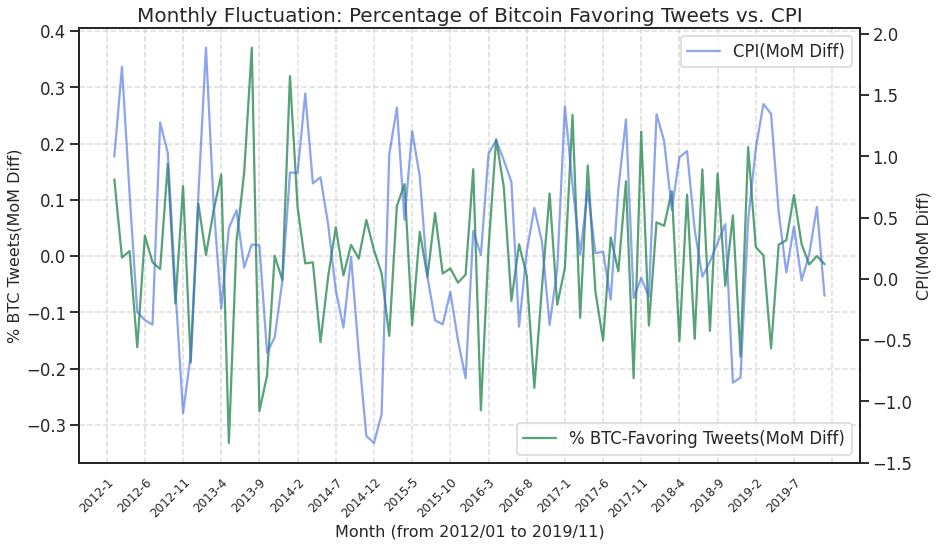

In [128]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))


sns.lineplot(x='year_month', y='perc_btc_favor_tweets_diff',
              data=ts1,ax=ax,label = '% BTC-Favoring Tweets(MoM Diff)',
            color = 'seagreen',alpha = 0.8)
ax.set_title(f"Monthly Fluctuation: Percentage of Bitcoin Favoring Tweets vs. CPI",fontsize=20)
ax.set_xlabel('Month (from 2012/01 to 2019/11)',fontsize = 16)
ax.set_ylabel(f"% BTC Tweets(MoM Diff)",fontsize = 16)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.setp(ax.get_xticklabels(), fontsize = 12, rotation=45, ha="right", rotation_mode="anchor")
ax.legend(loc=4)


ax.grid(linestyle="--", alpha=0.7)
ax0_y = ax.twinx()
sns.lineplot(x='year_month', y='cpi_month_diff', 
              data=cpi_df, ax=ax0_y, label = 'CPI(MoM Diff)',
            color = 'royalblue', alpha = 0.6
)
ax0_y.set_ylabel(f"CPI(MoM Diff)",fontsize = 16)
ax0_y.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.setp(ax0_y.get_xticklabels(), fontsize = 12, rotation=45, ha="right", rotation_mode="anchor")
ax0_y.legend(loc=1)

plt.savefig('/content/drive/MyDrive/Research: Changing Opinions towards Cryptocurrency under Rising Cost of Living/Graph/eda_btc_cpi_lineplot_1.png',dpi=300)
plt.show()


#### 3-2-2. Average Likes & Retweets on Bitcoin Favoring Tweets


In [74]:
ts1['avg_btc_favor_likes_diff'] = ts1.avg_btc_favor_likes.diff()
ts1['avg_btc_favor_retweets_diff'] = ts1.avg_btc_favor_retweets.diff()


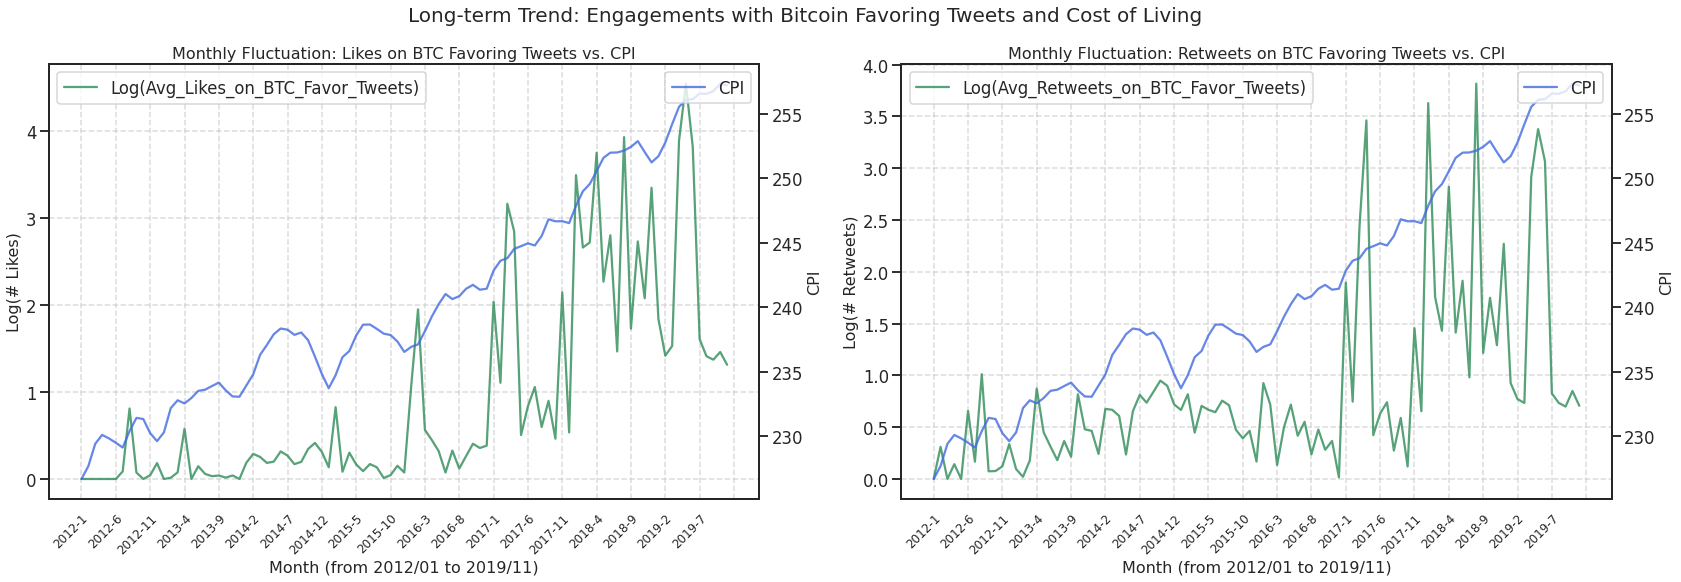

In [133]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(28, 8))


sns.lineplot(x='year_month', y='log_avg_btc_favor_likes',
              data=ts1,ax=axes[0],label = 'Log(Avg_Likes_on_BTC_Favor_Tweets)',
            color = 'seagreen',alpha = 0.8)
axes[0].set_title(f"Monthly Fluctuation: Likes on BTC Favoring Tweets vs. CPI",fontsize=16)
axes[0].set_xlabel('Month (from 2012/01 to 2019/11)',fontsize = 16)
axes[0].set_ylabel(f"Log(# Likes)",fontsize = 16)
axes[0].xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.setp(axes[0].get_xticklabels(), fontsize = 12, rotation=45, ha="right", rotation_mode="anchor")
axes[0].legend(loc=0)
axes[0].grid(linestyle="--", alpha=0.7)
ax0_y = axes[0].twinx()
sns.lineplot(x='year_month', y='cpi', 
              data=cpi_df, ax=ax0_y, label = 'CPI',
            color = 'royalblue',alpha = 0.8
)
ax0_y.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.setp(ax0_y.get_xticklabels(), fontsize = 12, rotation=45, ha="right", rotation_mode="anchor")
ax0_y.set_ylabel(f"CPI",fontsize = 16)
ax0_y.legend(loc=1)


sns.lineplot(x='year_month', y='log_avg_btc_favor_retweets',
              data=ts1,ax=axes[1],label = 'Log(Avg_Retweets_on_BTC_Favor_Tweets)',
            color = 'seagreen',alpha = 0.8)
axes[1].set_title(f"Monthly Fluctuation: Retweets on BTC Favoring Tweets vs. CPI",fontsize=16)
axes[1].set_xlabel('Month (from 2012/01 to 2019/11)',fontsize = 16)
axes[1].set_ylabel(f"Log(# Retweets)",fontsize = 16)
axes[1].xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.setp(axes[1].get_xticklabels(), fontsize = 12, rotation=45, ha="right", rotation_mode="anchor")
axes[1].legend(loc=0)
axes[1].grid(linestyle="--", alpha=0.7)
ax1_y = axes[1].twinx()
sns.lineplot(x='year_month', y='cpi', 
              data=cpi_df, ax=ax1_y, label = 'CPI',
            color = 'royalblue',alpha = 0.8
)
ax1_y.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.setp(ax1_y.get_xticklabels(), fontsize = 12, rotation=45, ha="right", rotation_mode="anchor")
ax1_y.set_ylabel(f"CPI",fontsize = 16)
ax1_y.legend(loc=1)

fig.suptitle("Long-term Trend: Engagements with Bitcoin Favoring Tweets and Cost of Living", fontsize = 20)
plt.savefig('/content/drive/MyDrive/Research: Changing Opinions towards Cryptocurrency under Rising Cost of Living/Graph/eda_btc_cpi_lineplot_2.png',dpi=300)
plt.show()


#### 3-2-3. Opinion Dynamics


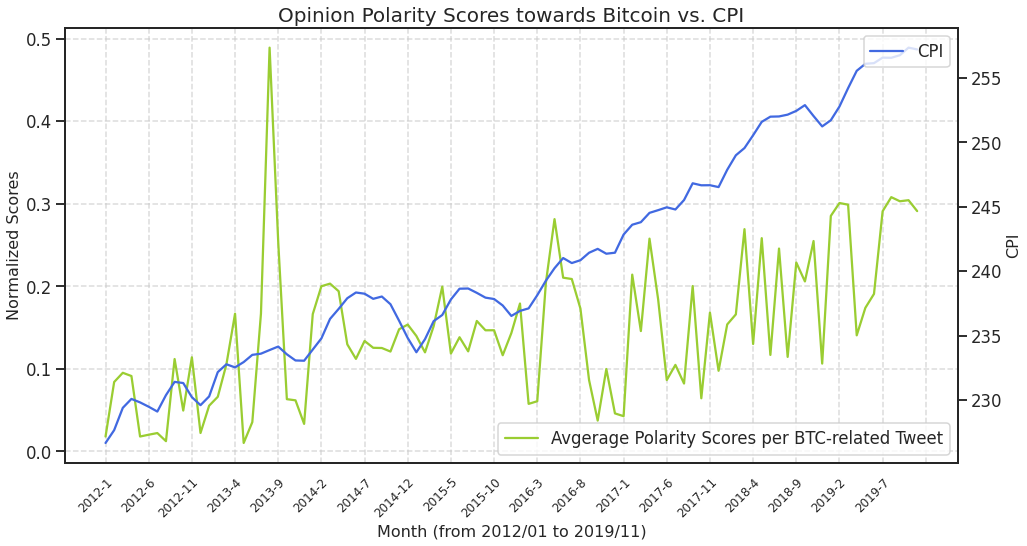

In [130]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))


sns.lineplot(x='year_month', y='avg_polarity_scores',
              data=ts1,ax=ax,label = 'Avgerage Polarity Scores per BTC-related Tweet',
            color = 'yellowgreen')
ax.set_title(f"Opinion Polarity Scores towards Bitcoin vs. CPI",fontsize=20)
ax.set_xlabel('Month (from 2012/01 to 2019/11)',fontsize = 16)
ax.set_ylabel(f"Normalized Scores",fontsize = 16)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.setp(ax.get_xticklabels(), fontsize = 12, rotation=45, ha="right", rotation_mode="anchor")
ax.legend(loc=4)
ax.grid(linestyle="--", alpha=0.7)
ax0_y = ax.twinx()
sns.lineplot(x='year_month', y='cpi', 
              data=cpi_df, ax=ax0_y, label = 'CPI',
            color = 'royalblue'
)
ax0_y.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.setp(ax0_y.get_xticklabels(), fontsize = 12, rotation=45, ha="right", rotation_mode="anchor")
ax0_y.set_ylabel(f"CPI",fontsize = 16)
ax0_y.legend(loc=1)

plt.savefig('/content/drive/MyDrive/Research: Changing Opinions towards Cryptocurrency under Rising Cost of Living/Graph/eda_polar_cost_lineplot_1.png',dpi=200)
plt.show()


## 4. Crypto Investment Actions

In [115]:
# Load in the data
wallet = pd.read_csv("/content/drive/MyDrive/Research: Changing Opinions towards Cryptocurrency under Rising Cost of Living/Data/btc_wallets_ts.csv",sep=',')
price = pd.read_csv("/content/drive/MyDrive/Research: Changing Opinions towards Cryptocurrency under Rising Cost of Living/Data/btc_price_ts.csv",sep=',')
trx = pd.read_csv("/content/drive/MyDrive/Research: Changing Opinions towards Cryptocurrency under Rising Cost of Living/Data/btc_trx_ts.csv",sep=',')

In [116]:
# Get year, month columns
def get_ts_var(df):
    df['year'] = list(map(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S').year, df.Timestamp))
    df['month'] = list(map(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S').month, df.Timestamp))
    df['year_month'] = list(map(lambda x,y:str(x)+"-"+str(y), df.year,df.month ))
    return df

wallet = get_ts_var(wallet)
price = get_ts_var(price)
trx = get_ts_var(trx)

In [117]:
def get_ym_agg(df,col,func):
    return df.groupby('year_month').agg({col:func}).reset_index()

wallet = get_ym_agg(wallet, 'my-wallet-n-users','mean')
price = get_ym_agg(price, 'market-price', 'mean')
trx = get_ym_agg(trx, 'n-transactions','mean')


In [118]:
tmp = pd.merge(left = wallet, right = price, how = 'inner', on = 'year_month')
ts2 = pd.merge(left = tmp, right = trx, how = 'inner', on = 'year_month')
ts2.columns = ['year_month','total_wallet','avg_price','avg_trx']

In [119]:
ts3 = pd.merge(left = ts1, right = ts2, how = 'left', on = 'year_month')

In [148]:
hf.view(ts3)

The dataset consists of 95 rows and 22 columns
The columns are: ['year_month', 'btc_tweets_cnt', 'total_btc_tweets_likes', 'total_btc_tweets_retweets', 'perc_btc_favor_tweets', 'avg_btc_favor_score', 'avg_polarity_score', 'log_avg_btc_tweets_likes', 'log_avg_btc_tweets_retweets', 'log_total_btc_tweets_cnt', 'year', 'month', 'cpi', 'month_ind', 'cpi_month_diff', 'cpi_year_diff', 'cpi_MoM', 'cpi_YoY', 'log_cpi', 'total_wallet', 'avg_price', 'avg_trx']


,year_month,btc_tweets_cnt,total_btc_tweets_likes,total_btc_tweets_retweets,perc_btc_favor_tweets,avg_btc_favor_score,avg_polarity_score,log_avg_btc_tweets_likes,log_avg_btc_tweets_retweets,log_total_btc_tweets_cnt,...,cpi,month_ind,cpi_month_diff,cpi_year_diff,cpi_MoM,cpi_YoY,log_cpi,total_wallet,avg_price,avg_trx
data_types,object,int64,int64,int64,float64,float64,float64,float64,float64,float64,...,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64
value_counts,95,83,69,74,85,90,90,81,88,83,...,95,12,94,82,94,83,95,87,87,87
null_counts,0,0,0,0,0,0,0,0,0,0,...,0,0,1,12,1,12,0,8,8,8
0,2012-1,13,0,0,0.0,0.0,0.0,0.0,0.0,2.639057,...,226.665,1,NaN,NaN,NaN,NaN,5.423473,758.0,6.497,6538.272727
1,2012-10,11,0,0,0.090909,0.0449,0.0449,0.0,0.0,2.484907,...,231.317,10,-0.09,NaN,0.999611,NaN,5.443789,32425.0,12.053,30083.090909
2,2012-11,14,0,0,0.0,0.0,0.0,0.0,0.0,2.70805,...,230.221,11,-1.096,NaN,0.995262,NaN,5.43904,42576.5,11.599091,30285.9


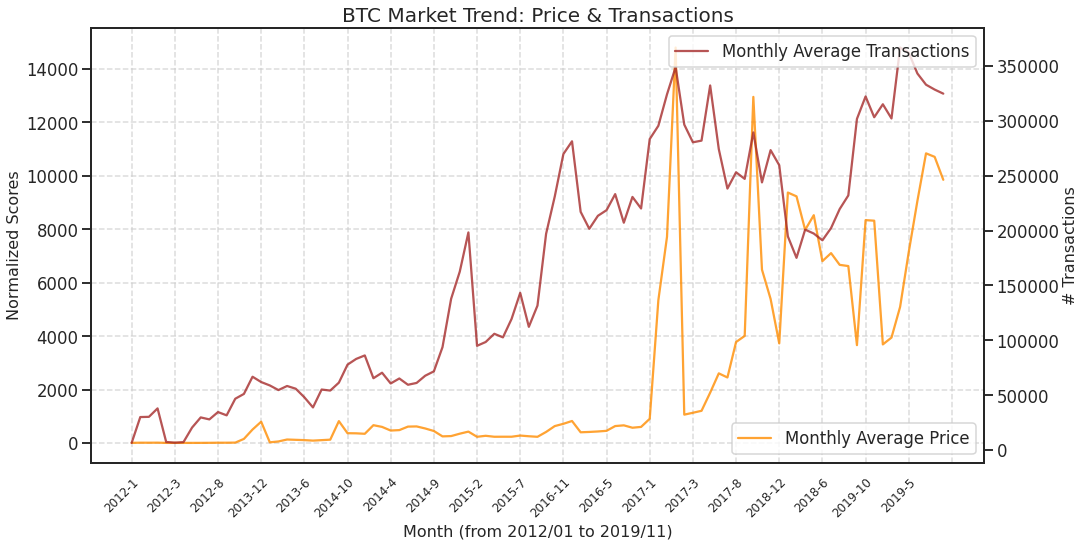

In [131]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))


sns.lineplot(x='year_month', y='avg_price',
              data=ts3,ax=ax,label = 'Monthly Average Price',
            color = 'darkorange',alpha = 0.8)
ax.set_title(f"BTC Market Trend: Price & Transactions",fontsize=20)
ax.set_xlabel('Month (from 2012/01 to 2019/11)',fontsize = 16)
ax.set_ylabel(f"Normalized Scores",fontsize = 16)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.setp(ax.get_xticklabels(), fontsize = 12, rotation=45, ha="right", rotation_mode="anchor")
ax.legend(loc=4)
ax.grid(linestyle="--", alpha=0.7)
ax0_y = ax.twinx()
sns.lineplot(x='year_month', y='avg_trx',
              data=ts3,ax=ax0_y,label = 'Monthly Average Transactions',
            color = 'brown',alpha = 0.8)
ax0_y.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.setp(ax0_y.get_xticklabels(), fontsize = 12, rotation=45, ha="right", rotation_mode="anchor")
ax0_y.set_ylabel(f"# Transactions",fontsize = 16)
ax0_y.legend(loc=1)

plt.savefig('/content/drive/MyDrive/Research: Changing Opinions towards Cryptocurrency under Rising Cost of Living/Graph/eda_crypto_lineplot_2.png',dpi=200)
plt.show()


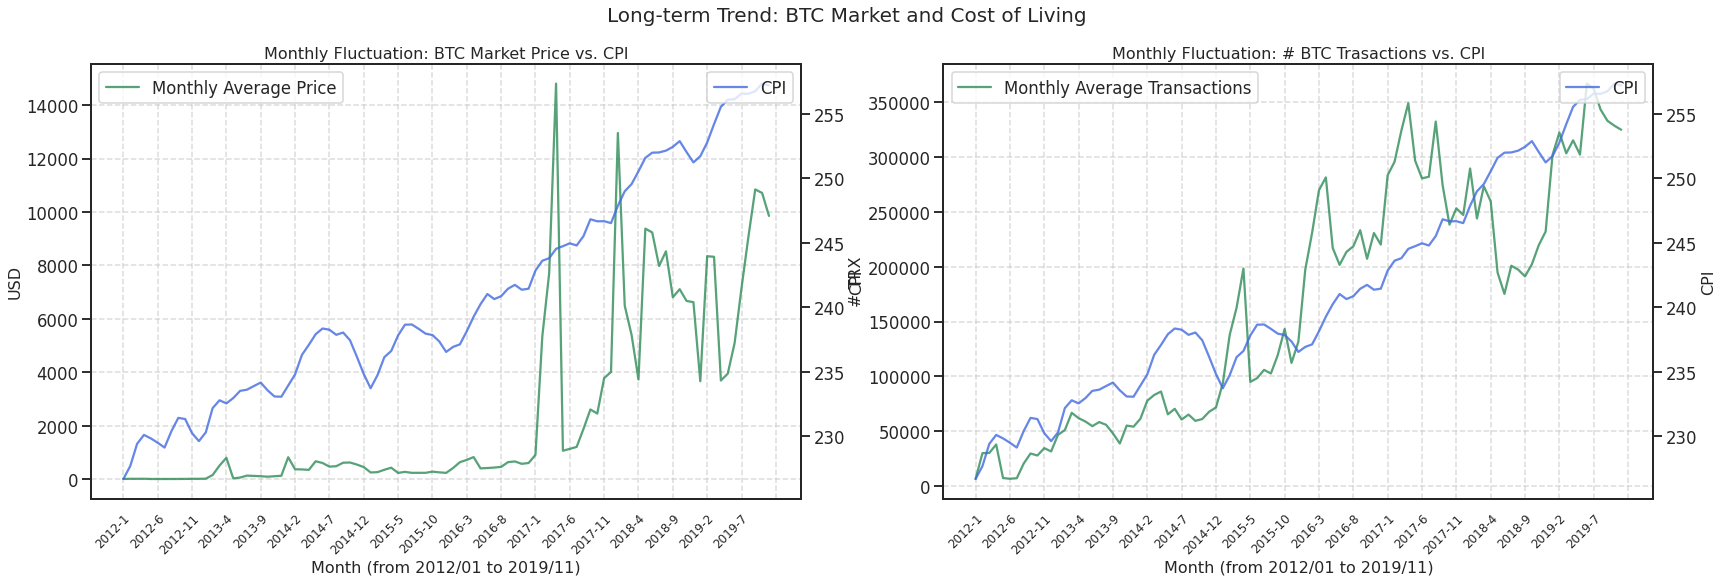

In [132]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(28, 8))


sns.lineplot(x='year_month', y='avg_price',
              data=ts3,ax=axes[0],label = 'Monthly Average Price',
            color = 'seagreen',alpha = 0.8)
axes[0].set_title(f"Monthly Fluctuation: BTC Market Price vs. CPI",fontsize=16)
axes[0].set_xlabel('Month (from 2012/01 to 2019/11)',fontsize = 16)
axes[0].set_ylabel(f"USD",fontsize = 16)
axes[0].xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.setp(axes[0].get_xticklabels(), fontsize = 12, rotation=45, ha="right", rotation_mode="anchor")
axes[0].legend(loc=0)
axes[0].grid(linestyle="--", alpha=0.7)
ax0_y = axes[0].twinx()
sns.lineplot(x='year_month', y='cpi', 
              data=cpi_df, ax=ax0_y, label = 'CPI',
            color = 'royalblue',alpha = 0.8
)
ax0_y.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.setp(ax0_y.get_xticklabels(), fontsize = 12, rotation=45, ha="right", rotation_mode="anchor")
ax0_y.set_ylabel(f"CPI",fontsize = 16)
ax0_y.legend(loc=1)


sns.lineplot(x='year_month', y='avg_trx',
              data=ts3,ax=axes[1],label = 'Monthly Average Transactions',
            color = 'seagreen',alpha = 0.8)
axes[1].set_title(f"Monthly Fluctuation: # BTC Trasactions vs. CPI",fontsize=16)
axes[1].set_xlabel('Month (from 2012/01 to 2019/11)',fontsize = 16)
axes[1].set_ylabel(f"# TRX",fontsize = 16)
axes[1].xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.setp(axes[1].get_xticklabels(), fontsize = 12, rotation=45, ha="right", rotation_mode="anchor")
axes[1].legend(loc=0)
axes[1].grid(linestyle="--", alpha=0.7)
ax1_y = axes[1].twinx()
sns.lineplot(x='year_month', y='cpi', 
              data=cpi_df, ax=ax1_y, label = 'CPI',
            color = 'royalblue',alpha = 0.8
)
ax1_y.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.setp(ax1_y.get_xticklabels(), fontsize = 12, rotation=45, ha="right", rotation_mode="anchor")
ax1_y.set_ylabel(f"CPI",fontsize = 16)
ax1_y.legend(loc=1)

fig.suptitle("Long-term Trend: BTC Market and Cost of Living", fontsize = 20)
plt.savefig('/content/drive/MyDrive/Research: Changing Opinions towards Cryptocurrency under Rising Cost of Living/Graph/eda_btc_cpi_lineplot_3.png',dpi=300)
plt.show()


# Time Series Analysis

In [63]:
ts1.head()

,year_month,btc_tweets_cnt,total_btc_tweets_likes,total_btc_tweets_retweets,perc_btc_favor_tweets,avg_btc_favor_score,avg_polarity_score,log_avg_btc_tweets_likes,log_avg_btc_tweets_retweets,log_total_btc_tweets_cnt,year,month,cpi,month_ind,cpi_month_diff,cpi_year_diff,cpi_MoM,cpi_YoY,log_cpi
0,2012-1,13,0,0,0.000000,0.0000,0.0000,0.0,0.0,2.639057,2012,Jan,226.665,1,NaN,NaN,NaN,NaN,5.423473
1,2012-10,11,0,0,0.090909,0.0449,0.0449,0.0,0.0,2.484907,2012,Oct,231.317,10,-0.090,NaN,0.999611,NaN,5.443789
2,2012-11,14,0,0,0.000000,0.0000,0.0000,0.0,0.0,2.708050,2012,Nov,230.221,11,-1.096,NaN,0.995262,NaN,5.439040
3,2012-12,5,0,0,0.000000,0.0000,0.0000,0.0,0.0,1.791759,2012,Dec,229.601,12,-0.620,NaN,0.997307,NaN,5.436343
4,2012-2,19,0,0,0.000000,0.0000,0.0000,0.0,0.0,2.995732,2012,Feb,227.663,2,0.998,NaN,1.004403,NaN,5.427866


## Stationarity

Augmented Dickey Fuller

In [4]:
from statsmodels.tsa.stattools import adfuller
def augmented_dickey_fuller_statistics(time_series):
  '''
  The null hypothesis of DF test is that there is a unit root in an AR model, which implies that the data series is not stationary. 
  
  p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
  p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
  '''
  result = adfuller(time_series.values)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [64]:
print('Augmented Dickey-Fuller Test: CPI-U')
augmented_dickey_fuller_statistics(ts1['cpi'])

print('\nAugmented Dickey-Fuller Test: CPI-YoY')
augmented_dickey_fuller_statistics(ts1['cpi_YoY'].dropna())

print('\nAugmented Dickey-Fuller Test: CPI-MoM-dIFF')
augmented_dickey_fuller_statistics(ts1['cpi_month_diff'].dropna())

print('\nAugmented Dickey-Fuller Test: % BTC Favor Tweets')
augmented_dickey_fuller_statistics(ts1['perc_btc_favor_tweets'])

print('\nAugmented Dickey-Fuller Test: BTC Favor Scores')
augmented_dickey_fuller_statistics(ts1['avg_btc_favor_score'])

Augmented Dickey-Fuller Test: CPI-U
ADF Statistic: 1.296208
p-value: 0.996588
Critical Values:
	1%: -3.513
	5%: -2.897
	10%: -2.586

Augmented Dickey-Fuller Test: CPI-YoY
ADF Statistic: -2.594709
p-value: 0.094096
Critical Values:
	1%: -3.513
	5%: -2.897
	10%: -2.586

Augmented Dickey-Fuller Test: CPI-MoM-dIFF
ADF Statistic: -1.567178
p-value: 0.500057
Critical Values:
	1%: -3.513
	5%: -2.897
	10%: -2.586

Augmented Dickey-Fuller Test: % BTC Favor Tweets
ADF Statistic: -5.795489
p-value: 0.000000
Critical Values:
	1%: -3.502
	5%: -2.893
	10%: -2.583

Augmented Dickey-Fuller Test: BTC Favor Scores
ADF Statistic: -6.185969
p-value: 0.000000
Critical Values:
	1%: -3.502
	5%: -2.893
	10%: -2.583


KPSS Test

In [46]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')
    print("------------------------------------------------------------------")

In [65]:
kpss_test(ts1['cpi'])
kpss_test(ts1['cpi_YoY'].dropna())
kpss_test(ts1['cpi_month_diff'].dropna())
kpss_test(ts1['perc_btc_favor_tweets'])
kpss_test(ts1['avg_btc_favor_score'])

KPSS Statistic: 0.8183663801946107
p-value: 0.01
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary
------------------------------------------------------------------
KPSS Statistic: 0.32611821877416486
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
------------------------------------------------------------------
KPSS Statistic: 0.4408966028947224
p-value: 0.05952732633848174
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
------------------------------------------------------------------
KPSS Statistic: 0.4672513144436525
p-value: 0.049042496746925124
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary
------------------------------------------------------------------
KPSS Statisti

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1882: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1886: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1886: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


## Granger Causality Test

Direction 1: Cost of living => Support BTC

In [15]:
!pip install statsmodels==0.12.1

     |████████████████████████████████| 9.5 MB 5.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [17]:
# import statsmodels
# statsmodels.__version__

'0.10.2'

In [34]:
ts1['log_cpi']=np.log(ts1.cpi)

In [66]:
from statsmodels.tsa.stattools import grangercausalitytests

#perform Granger-Causality test
x = 'cpi_YoY'
x = 'cpi'
x = 'cpi_month_diff'
y = 'perc_btc_favor_tweets'
#y = 'avg_btc_favor_score'
grangercausalitytests(ts1[[x,y]].dropna(), maxlag=[3])


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0392  , p=0.9896  , df_denom=84, df_num=3
ssr based chi2 test:   chi2=0.1274  , p=0.9884  , df=3
likelihood ratio test: chi2=0.1273  , p=0.9884  , df=3
parameter F test:         F=0.0392  , p=0.9896  , df_denom=84, df_num=3


{3: ({'lrtest': (0.12726154711413074, 0.9883763022398694, 3),
   'params_ftest': (0.03918479227129119, 0.9895714412473801, 84.0, 3.0),
   'ssr_chi2test': (0.12735057488171028, 0.988364411307011, 3),
   'ssr_ftest': (0.03918479227129547, 0.9895714412473788, 84.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [67]:
# Perform the inverse Granger-Causality test
grangercausalitytests(ts1[[y,x]].dropna(), maxlag=[2])


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2126  , p=0.3024  , df_denom=87, df_num=2
ssr based chi2 test:   chi2=2.5646  , p=0.2774  , df=2
likelihood ratio test: chi2=2.5295  , p=0.2823  , df=2
parameter F test:         F=1.2126  , p=0.3024  , df_denom=87, df_num=2


{2: ({'lrtest': (2.529474898534602, 0.28231340800315763, 2),
   'params_ftest': (1.212595053728672, 0.3024008819048884, 87.0, 2.0),
   'ssr_chi2test': (2.5645688492652527, 0.2774028701252873, 2),
   'ssr_ftest': (1.2125950537286794, 0.30240088190488584, 87.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [68]:
maxlag=2 
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

o = grangers_causation_matrix(ts1.dropna(), variables = ['cpi_YoY','avg_btc_favor_score'])  

In [69]:
o

,cpi_YoY_x,avg_btc_favor_score_x
cpi_YoY_y,1.000,0.5206
avg_btc_favor_score_y,0.656,1.0000


### VAR Model

In [70]:
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic

In [71]:
# split data into train and test. We will need this later for VAR analysis
train_index = np.random.rand(len(ts1)) < 0.8
train = ts1[train_index]
test = ts1[~train_index]

In [72]:
# GridSearch for optimal p in terms of AIC
for i in range(1,10):
    model = VAR(train[['cpi_month_diff','avg_btc_favor_score']].dropna())
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  -6.14339233750656
BIC:  -5.953670160921889

Order = 2
AIC:  -6.302138777373644
BIC:  -5.983451470748106

Order = 3
AIC:  -6.274689440107729
BIC:  -5.824990391697858

Order = 4
AIC:  -6.260425063677878
BIC:  -5.677614671174244

Order = 5
AIC:  -6.140550335783166
BIC:  -5.422474313520308

Order = 6
AIC:  -6.104585921328322
BIC:  -5.249033561564664

Order = 7
AIC:  -6.013128137264188
BIC:  -5.017830527252176

Order = 8
AIC:  -5.943841471144519
BIC:  -4.806469668429878

Order = 9
AIC:  -5.9735626965084165
BIC:  -4.691725865763612



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was pro

In [73]:
res = model.fit(1)
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 23, Apr, 2022
Time:                     15:02:43
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -5.95367
Nobs:                     72.0000    HQIC:                  -6.06786
Log likelihood:           22.8350    FPE:                 0.00214783
AIC:                     -6.14339    Det(Omega_mle):      0.00197944
--------------------------------------------------------------------
Results for equation cpi_month_diff
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                          0.119538         0.141187            0.847           0.397
L1.cpi_month_diff              0.305684         0.113419            2.695           0.007
L1.avg_btc_favo

In [ ]:
# obtain the lag P for VAR
rawData = df[['cpi_YoY','avg_btc_favor_score']].dropna()
model = VAR(rawData) #recall that rawData is w/o difference operation
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    result = model.fit(i)
    try:
        print('Lag Order =', i)
        print('AIC : ', result.aic)
        print('BIC : ', result.bic)
        print('FPE : ', result.fpe)
        print('HQIC: ', result.hqic, '\n')
    except:
        continue

# Appendix

## Un-used Plots

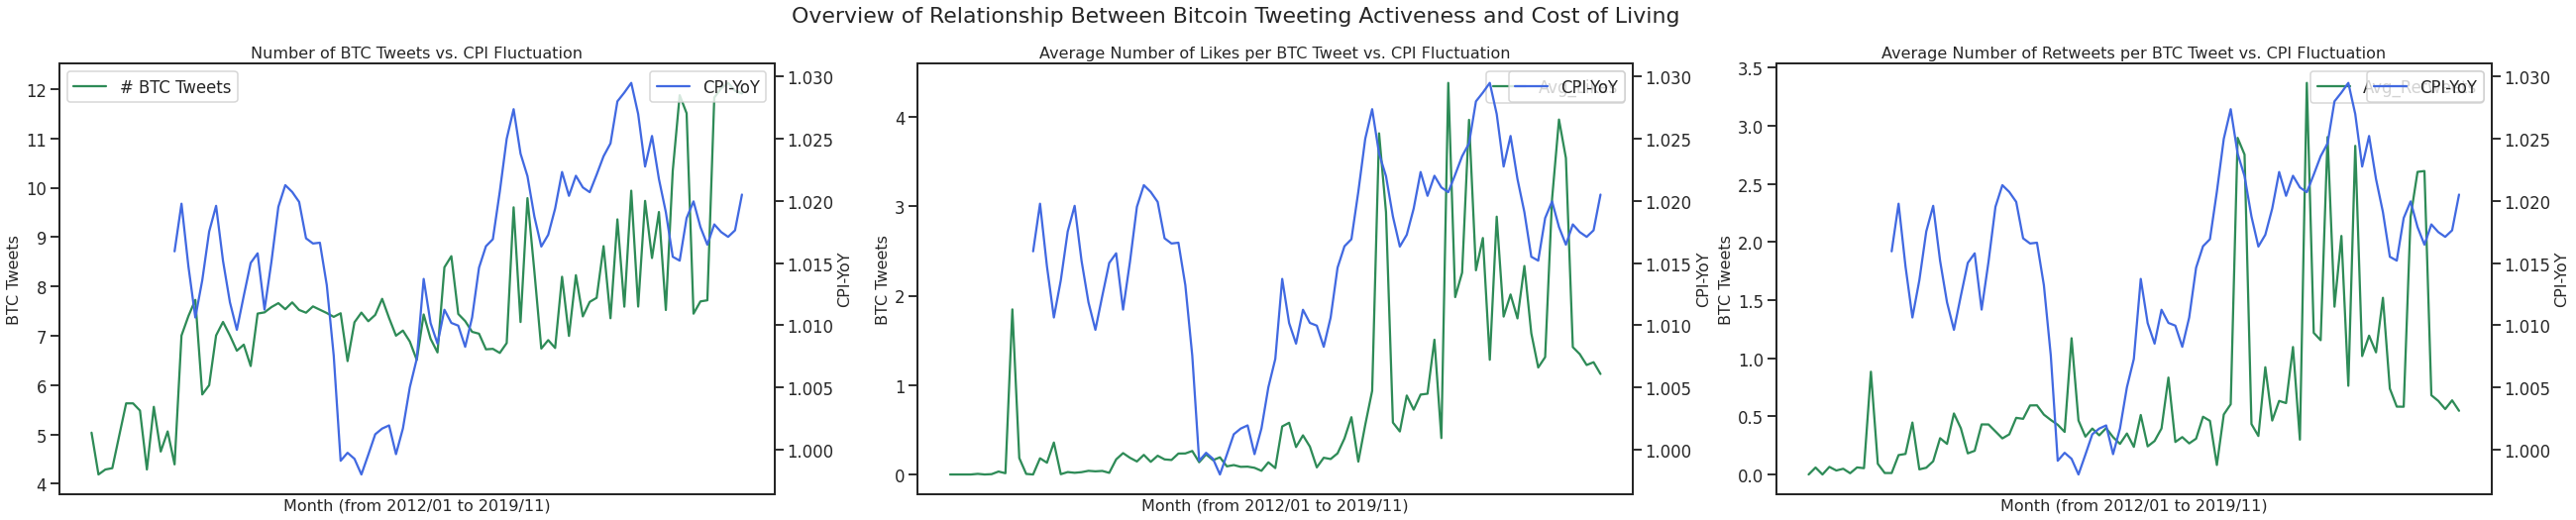

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(44, 8))


sns.lineplot(x='year_month', y='log_total_btc_tweets_cnt',
              data=ts1,ax=axes[0],label = '# BTC Tweets',
            color = 'seagreen')
axes[0].set_title(f"Number of BTC Tweets vs. CPI Fluctuation",fontsize=16)
axes[0].set_xlabel('Month (from 2012/01 to 2019/11)',fontsize = 16)
axes[0].set_ylabel(f"BTC Tweets",fontsize = 16)
axes[0].set_xticks(())
axes[0].legend(loc=0)
# axes[0].grid(linestyle="--", alpha=0.7)
ax0_y = axes[0].twinx()
sns.lineplot(x='year_month', y='cpi_YoY', 
              data=cpi_df, ax=ax0_y, label = 'CPI-YoY',
            color = 'royalblue'
)
ax0_y.set_xticks(())
ax0_y.set_ylabel(f"CPI-YoY",fontsize = 16)
ax0_y.legend(loc=1)


sns.lineplot(x='year_month', y='log_avg_btc_tweets_likes',
              data=ts1,ax=axes[1],label = 'Avg_Likes',
            color = 'seagreen')
axes[1].set_title(f"Average Number of Likes per BTC Tweet vs. CPI Fluctuation",fontsize=16)
axes[1].set_xlabel('Month (from 2012/01 to 2019/11)',fontsize = 16)
axes[1].set_ylabel(f"BTC Tweets",fontsize = 16)
axes[1].set_xticks(())
axes[1].legend(loc=0)
# axes[1].grid(linestyle="--", alpha=0.7)
ax1_y = axes[1].twinx()
sns.lineplot(x='year_month', y='cpi_YoY', 
              data=cpi_df, ax=ax1_y, label = 'CPI-YoY',
            color = 'royalblue'
)
ax1_y.set_xticks(())
ax1_y.set_ylabel(f"CPI-YoY",fontsize = 16)
ax1_y.legend(loc=1)

sns.lineplot(x='year_month', y='log_avg_btc_tweets_retweets',
              data=ts1,ax=axes[2], label = 'Avg_Retweets',
            color = 'seagreen')
axes[2].set_title(f"Average Number of Retweets per BTC Tweet vs. CPI Fluctuation",fontsize=16)
axes[2].set_xlabel('Month (from 2012/01 to 2019/11)',fontsize = 16)
axes[2].set_ylabel(f"BTC Tweets",fontsize = 16)
axes[2].set_xticks(())
axes[2].legend(loc=0)
# axes[2].grid(linestyle="--", alpha=0.7)
ax2_y = axes[2].twinx()
sns.lineplot(x='year_month', y='cpi_YoY', 
              data=cpi_df, ax=ax2_y, label = 'CPI-YoY',
            color = 'royalblue'
)
ax2_y.set_xticks(())
ax2_y.set_ylabel(f"CPI-YoY",fontsize = 16)
ax2_y.legend(loc=1)

fig.suptitle("Overview of Relationship Between Bitcoin Tweeting Activeness and Cost of Living", fontsize = 22)
plt.savefig('/content/drive/MyDrive/Research: Changing Opinions towards Cryptocurrency under Rising Cost of Living/Graph/eda_crypto_cost_lineplot_1.png',dpi=200)
plt.show()
